# Project 1B: Berkeley PM2.5

Last update: Jan 20, 2019

In [1]:
# Name: <Please put your name here>

%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Getting the data

For this part, you will have to download hourly PM2.5 data from [http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt](http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt) 


<div class="alert alert-block alert-success">
Download the data
</div>

In [3]:
!curl http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt -o data/Bangkok.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  561k  100  561k    0     0  63924      0  0:00:09  0:00:09 --:--:-- 81883


In [3]:
# Expected output

--2019-01-21 03:25:21--  http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt
Resolving berkeleyearth.lbl.gov (berkeleyearth.lbl.gov)... 128.3.29.26
Connecting to berkeleyearth.lbl.gov (berkeleyearth.lbl.gov)|128.3.29.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572783 (559K) [text/plain]
Saving to: ‘Bangkok.txt’

Bangkok.txt         100%[===================>] 559.36K   227KB/s    in 2.5s    

2019-01-21 03:25:24 (227 KB/s) - ‘Bangkok.txt’ saved [572783/572783]



## Create DataFrame

<div class="alert alert-block alert-success">
Create a dataframe from the data as shown below
</div>

In [214]:
data = np.genfromtxt('data/Bangkok.txt', comments="%")
df = pd.DataFrame(data=data, columns=['year', 'month', 'day', 'utc_hour', 'pm2.5', 'pm10_mask', 'retrospective'])
for c in ['year', 'month', 'day', 'utc_hour']: 
    df[c] = df[c].astype(int)
df.head()

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective
0,2016,3,3,8,62.9,1.0,0.0
1,2016,3,3,9,62.9,1.0,0.0
2,2016,3,3,10,55.5,1.0,0.0
3,2016,3,3,11,55.5,1.0,0.0
4,2016,3,3,12,47.9,1.0,0.0


In [18]:
# Expected output

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0


<div class="alert alert-block alert-success">
Index the dataframe with datetime
</div>

In [216]:
for c in ['year', 'month', 'day', 'utc_hour']: 
    df[c] = df[c].astype(str)
time = df["year"]+"-"+df["month"]+"-"+df["day"]+" "+df["utc_hour"].apply(lambda x: '0'+x if len(x)==1 else x)
time = pd.to_datetime(time.apply(lambda x: x[:20]), format='%Y-%m-%d %H')
df.set_index(time, inplace=True, drop=True)
for c in ['year', 'month', 'day', 'utc_hour']: 
    df[c] = df[c].astype(int)
df.head()

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective
2016-03-03 08:00:00,2016,3,3,8,62.9,1.0,0.0
2016-03-03 09:00:00,2016,3,3,9,62.9,1.0,0.0
2016-03-03 10:00:00,2016,3,3,10,55.5,1.0,0.0
2016-03-03 11:00:00,2016,3,3,11,55.5,1.0,0.0
2016-03-03 12:00:00,2016,3,3,12,47.9,1.0,0.0


In [28]:
# Expected output

,year,month,day,utc_hour,pm2.5,pm10_mask,retrospective
2016-03-03 08:00:00,2016,3,3,8,62.9,1.0,0
2016-03-03 09:00:00,2016,3,3,9,62.9,1.0,0
2016-03-03 10:00:00,2016,3,3,10,55.5,1.0,0
2016-03-03 11:00:00,2016,3,3,11,55.5,1.0,0
2016-03-03 12:00:00,2016,3,3,12,47.9,1.0,0


<div class="alert alert-block alert-success">
Plot a line chart of PM2.5 over time
</div>

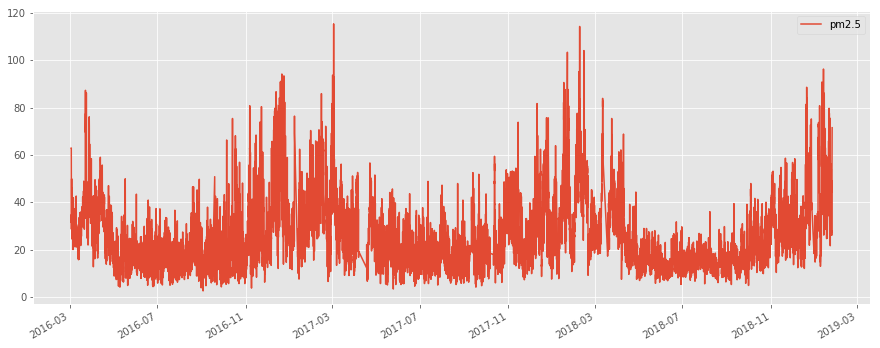

In [4]:
df.plot(y="pm2.5", figsize=(15,6))

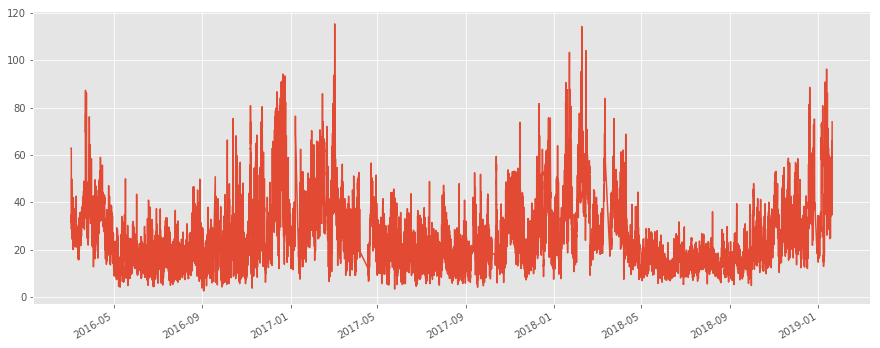

In [31]:
# Expected output

### Answer the following questions 

In this part, you must answer the following questions and present evidence from the data in the form of charts or tables.



<div class="alert alert-block alert-success">
Which month has the highest level of PM2.5 on average?
</div>

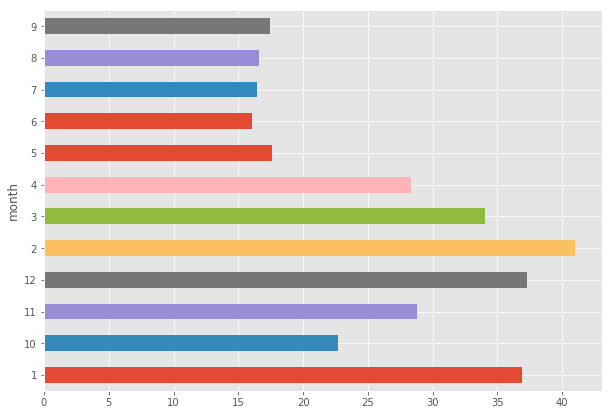

In [6]:
grouped_by_month = df.groupby("month")
avg_pm_month = grouped_by_month['pm2.5'].mean()
avg_pm_month.plot(kind='barh',stacked=True,figsize=(10,7))

Febuary has the highest level of PM2.5 on average

<div class="alert alert-block alert-success">
What time of day has the highest level of PM2.5 on average?
</div>

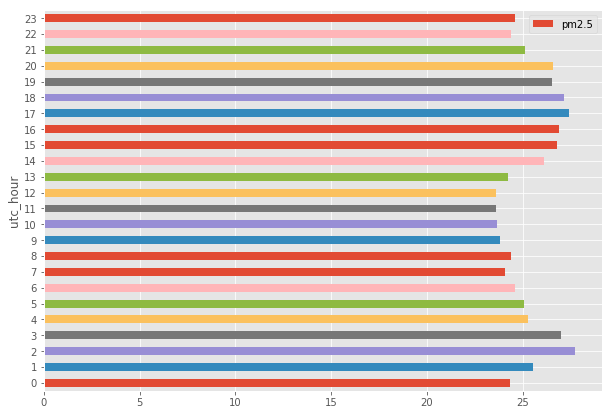

In [63]:
df['utc_hour'] = df['utc_hour'].astype(int)
grouped_by_day = df.groupby("utc_hour")
avg_pm_day = grouped_by_day['pm2.5'].mean()
avg_pm_day.plot(kind='barh',stacked=True,figsize=(10,7))
plt.legend()

2am UTC has the highest level of PM2.5 on average

<div class="alert alert-block alert-success">
Compare the level of PM2.5 during daytime and nighttime.
</div>

In [141]:
df['utc_hour'] = df['utc_hour'].astype(int)
day = df[(df["utc_hour"]>=6) & (df["utc_hour"] < 19)]
night = df[(df['utc_hour']>=19) | (df['utc_hour'] <= 5)]
print('Mean:')
print(f"day: {day['pm2.5'].mean()}")
print(f"night: {night['pm2.5'].mean()}")
print('Median:')
print(f"day: {day['pm2.5'].median()}")
print(f"night: {night['pm2.5'].median()}")

Mean:
day: 25.0958773451049
night: 25.659809188588348
Median:
day: 21.7
night: 21.3


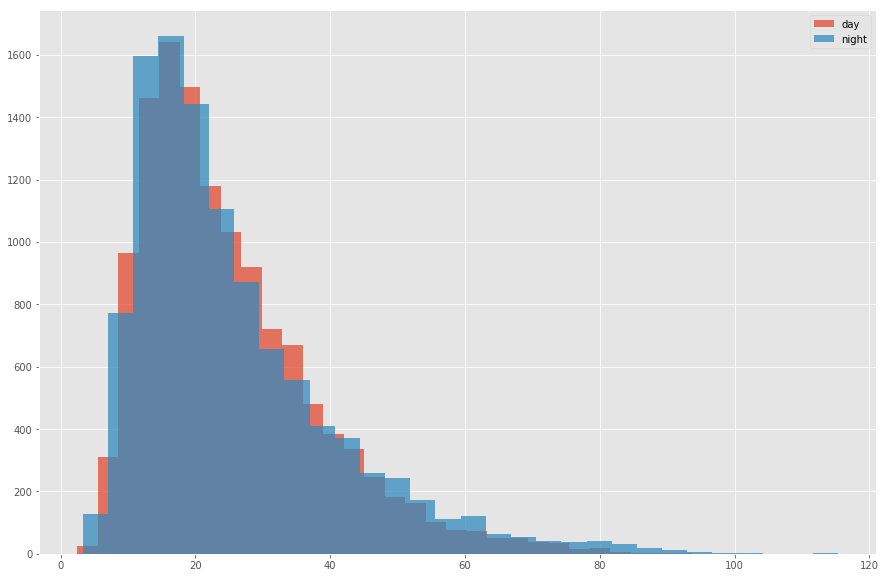

In [152]:
plt.figure(figsize=(15,10))
day['pm2.5'].hist(bins=30,alpha=0.75,label='day')
night['pm2.5'].hist(bins=30,alpha=0.75,label='night')
plt.legend()

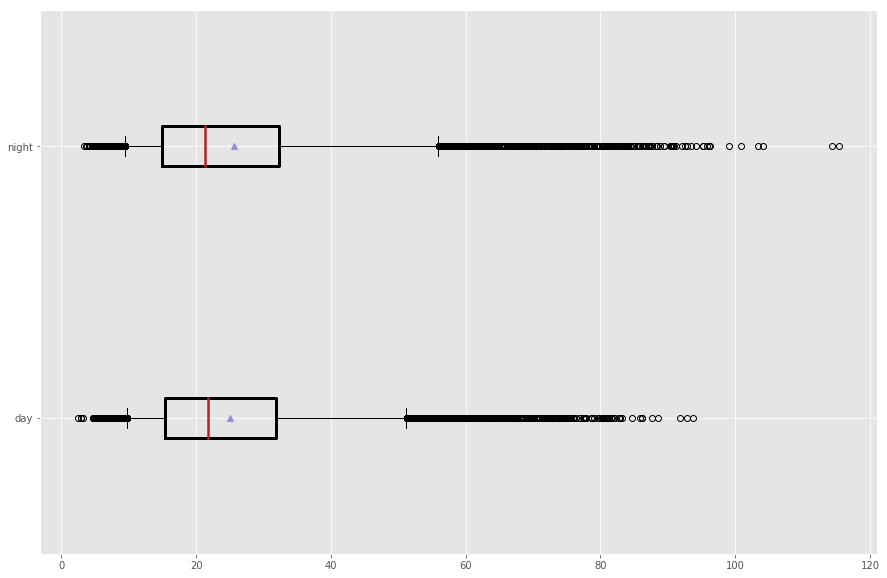

In [150]:
plt.figure(figsize=(15,10))
boxprops = dict(linestyle='-', linewidth=3)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
bp =plt.boxplot([day['pm2.5'],night['pm2.5']],vert=False, labels=['day','night'],showmeans=True,whis=[5,95], boxprops=boxprops,medianprops=medianprops)

## Investigate your own questions

In this part, you will come up with hypotheses/questions and then answer them using the summary statistics or visualization.

# \#1 What are the the months with unusual amount of pm2.5

In [552]:
sum1m = df['pm2.5'].resample('1M').mean()
q95 = sum1m.quantile(.75)
std = sum1m.std()
mean = sum1m.mean()
sum1m.describe()

count    35.000000
mean     25.686896
std       9.330947
min      14.136323
25%      17.149198
50%      24.337282
75%      32.980958
max      44.563540
Name: pm2.5, dtype: float64

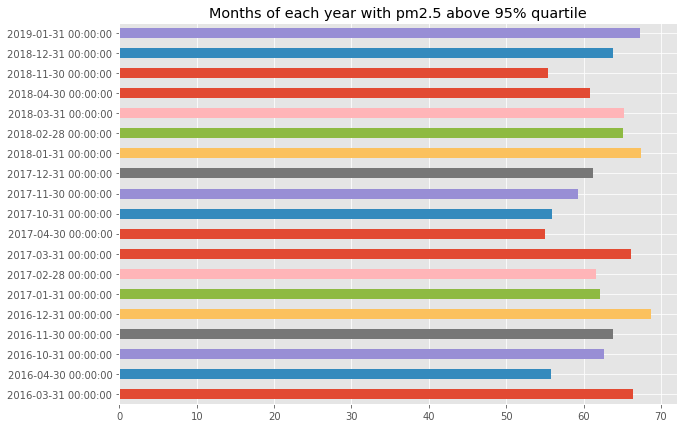

In [567]:
q95 = df['pm2.5'].quantile(.95)
df95 = df[df['pm2.5']>=q95]
df95.resample('1M').mean().dropna()['pm2.5'].plot(kind='barh', figsize=(10,7), title='Months of each year with pm2.5 above 95% quartile')

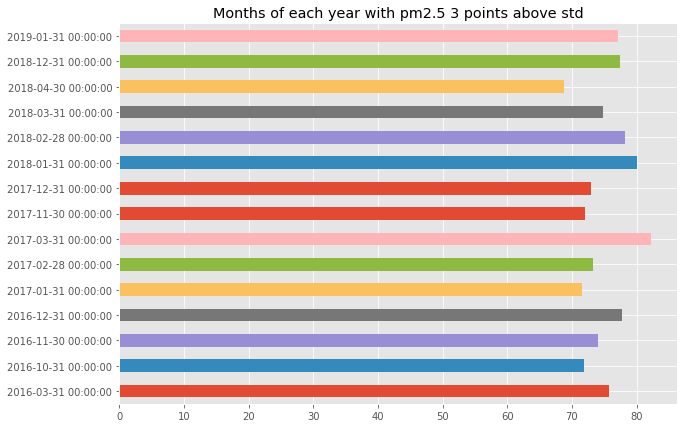

In [563]:
std = df['pm2.5'].std()
mean = df['pm2.5'].mean()
dfstd = df[df['pm2.5']>=(3.0*std+mean)]
dfstd.resample('1M').mean().dropna()['pm2.5'].plot(kind='barh', figsize=(10,7), title='Months of each year with pm2.5 3 points above std')

# \#2 Which year has the highest total amount of pm2.5 and which month in that specific year has the highest amount of pm2.5.

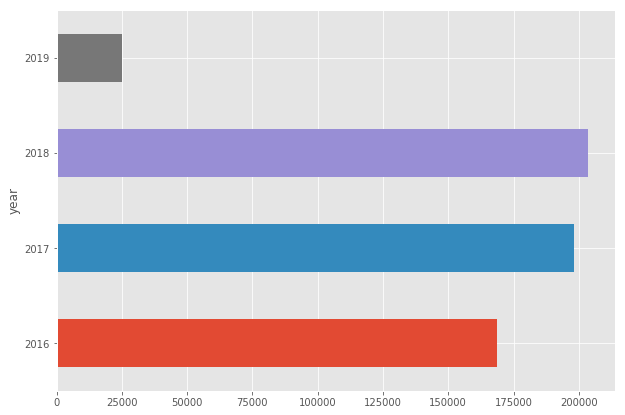

In [30]:
df['year'] = df['year'].astype(int)
years = df.groupby('year').sum()
years['pm2.5'].plot(kind='barh',stacked=True,figsize=(10,7))

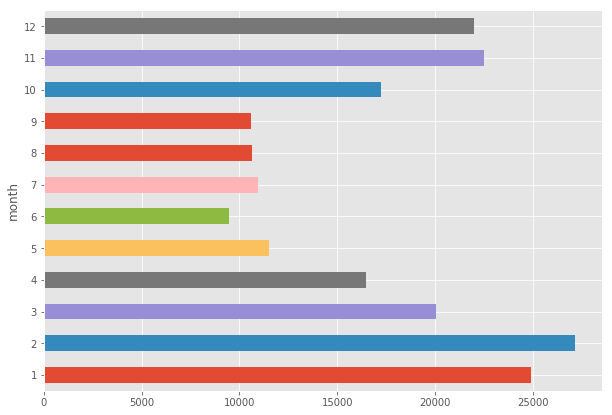

In [71]:
df['month'] = df['month'].astype(int)
year2018 = df[df['year']=='2018'].groupby('month').sum()
year2018['pm2.5'].plot(kind='barh',stacked=True,figsize=(10,7))

In [107]:
resample_month = df.resample('1M')
month_mean = resample_month['pm2.5'].sum().values.mean()
monthe_std = resample_month['pm2.5'].sum().values.std()
x1 = year2018['pm2.5'][2]
x2 = resample_month['pm2.5'].sum().max()
print(f'highest in 2018: {x1}')
print(f'highest in of all time: {x2}')
print(f'The month of the year with highest pm2.5 is {(x1-month_mean)/monthe_std} points above standard deviation')
print(f'The month with highest pm2.5 of all time is {(x2-month_mean)/monthe_std} points above standard deviation')

highest in 2018: 27187.099999999988
highest in of all time: 31261.2
The month of the year with highest pm2.5 is 1.7630069360667155 points above standard deviation
The month with highest pm2.5 of all time is 2.468852920929175 points above standard deviation


# How many days per year do you need to wear mask

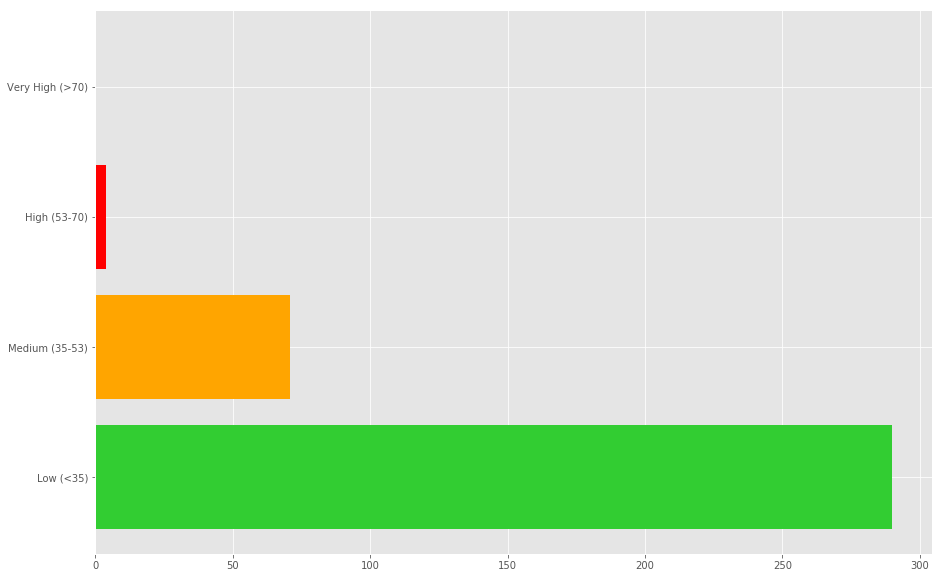

In 1 year, you need to wear mask for 75 days, especially in Dec, Jan and Feb where you need to wear mask for 57 day


In [402]:
# resample_day = df['pm2.5'].resample('1D').mean()
resample_day = df.groupby(['month', 'day']).mean()['pm2.5']
lowpm = resample_day[resample_day<=35]
medpm = resample_day[(resample_day>35) & (resample_day<=53)]
highpm = resample_day[(resample_day>53) & (resample_day<=70)]
vhighpm = resample_day[resample_day>70]

objects = ('Low (<35)', 'Medium (35-53)', 'High (53-70)', 'Very High (>70)')
y_pos = np.arange(len(objects))
values = [lowpm.size, medpm.size, highpm.size, vhighpm.size]

plt.figure(figsize=(15,10))
plt.barh(y_pos, values, align='center', color=['limegreen', 'orange', 'red', 'purple'])
plt.yticks(y_pos, objects)
plt.show()

over35 = pd.concat([resample_day.loc[1:2],resample_day.loc[12]])

print(f'In 1 year, you need to wear mask for {highpm.size+medpm.size} days, especially in Dec, Jan and Feb where you need to wear mask for {over35[over35>35].size} day')